In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Preprocessing and EDA (Exploratory Data Analysis)

In [2]:
train_dir = "../data/fer-2013-data/train"
for dirpath,dirname,filenames in os.walk(train_dir):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath[22:]}")

There are 7 directories and 0 images in train
There are 0 directories and 3995 images in train\angry
There are 0 directories and 436 images in train\disgust
There are 0 directories and 4097 images in train\fear
There are 0 directories and 7215 images in train\happy
There are 0 directories and 4965 images in train\neutral
There are 0 directories and 4830 images in train\sad
There are 0 directories and 3171 images in train\surprise


In [3]:
test_dir = "../data/fer-2013-data/test"
for dirpath,dirname,filenames in os.walk(test_dir):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath[22:]}")

There are 7 directories and 0 images in test
There are 0 directories and 958 images in test\angry
There are 0 directories and 111 images in test\disgust
There are 0 directories and 1024 images in test\fear
There are 0 directories and 1774 images in test\happy
There are 0 directories and 1233 images in test\neutral
There are 0 directories and 1247 images in test\sad
There are 0 directories and 831 images in test\surprise


In [4]:
data_gen = ImageDataGenerator(rescale=1./255)
train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)
validation_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


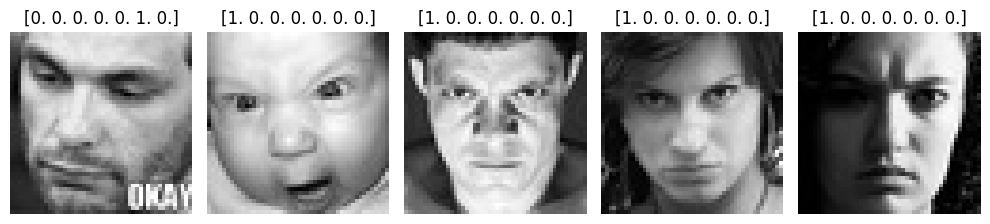

In [19]:
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items())

def plot_images(images_arr, labels_arr, label_map):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        class_label = label_map[np.argmax(label)]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(class_label)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(train_generator)
plot_images(images[:5], labels[:5], label_map)